# Вычисление производной функции $f(x) = 3^x$ через определение

Найдём производную, используя определение через приращение $dx$


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

init_printing()
plt.style.use('seaborn-v0_8-darkgrid')


In [7]:
x = symbols('x', real=True)
h = symbols('h', real=True, positive=True)

f = 3**x

print("Функция:")
display(f)


Функция:


## Шаг 2: Вычисление f(x + h)

Подставим $x + h$ вместо $x$:

$$f(x + h) = 3^{x+h}$$


In [8]:
f_x_plus_h = f.subs(x, x + h)

print("f(x + h):")
display(f_x_plus_h)


f(x + h):


## Шаг 3: Приращение функции

$$\Delta f = f(x+h) - f(x) = 3^{x+h} - 3^x$$

Используем свойство степеней: $3^{x+h} = 3^x \cdot 3^h$

$$\Delta f = 3^x \cdot 3^h - 3^x = 3^x(3^h - 1)$$


In [9]:
delta_f = f_x_plus_h - f

print("Δf = f(x+h) - f(x):")
display(delta_f)

print("\nУпростим:")
delta_f_simplified = simplify(delta_f)
display(delta_f_simplified)

print("\nВынесем 3^x за скобки:")
delta_f_factored = factor(delta_f)
display(delta_f_factored)


Δf = f(x+h) - f(x):



Упростим:



Вынесем 3^x за скобки:


## Шаг 4: Отношение приращений

$$\frac{\Delta f}{h} = \frac{3^x(3^h - 1)}{h} = 3^x \cdot \frac{3^h - 1}{h}$$


In [10]:
ratio = delta_f / h

print("Δf/h:")
display(ratio)

print("\nУпростим:")
ratio_simplified = simplify(ratio)
display(ratio_simplified)


Δf/h:



Упростим:


## Шаг 5: Предел при h → 0

$$f'(x) = \lim_{h \to 0} \frac{3^x(3^h - 1)}{h} = 3^x \cdot \lim_{h \to 0} \frac{3^h - 1}{h}$$

Найдём предел $\lim_{h \to 0} \frac{3^h - 1}{h}$


In [11]:
# Вычислим предел отношения приращений
derivative_from_limit = limit(ratio, h, 0)

print("Производная через предел:")
display(derivative_from_limit)

# Отдельно найдём предел (3^h - 1)/h
limit_part = limit((3**h - 1)/h, h, 0)
print("\nПредел (3^h - 1)/h при h → 0:")
display(limit_part)

print("\nЭто натуральный логарифм 3:")
print(f"ln(3) ≈ {float(log(3))}")


Производная через предел:



Предел (3^h - 1)/h при h → 0:



Это натуральный логарифм 3:
ln(3) ≈ 1.0986122886681098


## Шаг 6: Проверка через стандартную формулу

Формула производной показательной функции: $(a^x)' = a^x \ln(a)$

Для $f(x) = 3^x$: $f'(x) = 3^x \ln(3)$


In [12]:
# Вычислим производную стандартным способом
derivative_standard = diff(f, x)

print("Производная через diff():")
display(derivative_standard)

# Проверим, что результаты совпадают
print("\nРезультаты совпадают:")
difference = simplify(derivative_from_limit - derivative_standard)
display(difference)
print(f"Разность равна нулю: {difference == 0}")


Производная через diff():



Результаты совпадают:


Разность равна нулю: False


## Шаг 7: Численная проверка

Проверим, как отношение $\frac{3^{x+h} - 3^x}{h}$ стремится к $3^x \ln(3)$ при уменьшении $h$


In [13]:
# Выберем точку
x0 = 1.0

# Точное значение производной в точке x0
exact_derivative = 3**x0 * np.log(3)
print(f"Точное значение производной в x = {x0}:")
print(f"f'({x0}) = 3^{x0} * ln(3) = {exact_derivative:.10f}")

# Проверим для разных значений h
h_values = [10**(-i) for i in range(1, 11)]

print("\n" + "="*80)
print(f"{'h':^15} | {'Приближение':^25} | {'Ошибка':^20}")
print("="*80)

for h_val in h_values:
    # Приближение производной
    approx = (3**(x0 + h_val) - 3**x0) / h_val
    error = abs(approx - exact_derivative)
    print(f"{h_val:^15.0e} | {approx:^25.15f} | {error:^20.2e}")

print("="*80)


Точное значение производной в x = 1.0:
f'(1.0) = 3^1.0 * ln(3) = 3.2958368660

       h        |        Приближение        |        Ошибка       
     1e-01      |     3.483695221017138     |       1.88e-01      
     1e-02      |     3.314007581356071     |       1.82e-02      
     1e-03      |     3.297647952611893     |       1.81e-03      
     1e-04      |     3.296017914977689     |       1.81e-04      
     1e-05      |     3.295854970319922     |       1.81e-05      
     1e-06      |     3.295838676198315     |       1.81e-06      
     1e-07      |     3.295837047723182     |       1.82e-07      
     1e-08      |     3.295836847883038     |       1.81e-08      
     1e-09      |     3.295836936700880     |       7.07e-08      
     1e-10      |     3.295839157146929     |       2.29e-06      


## Шаг 8: Графическая визуализация


KeyboardInterrupt: 

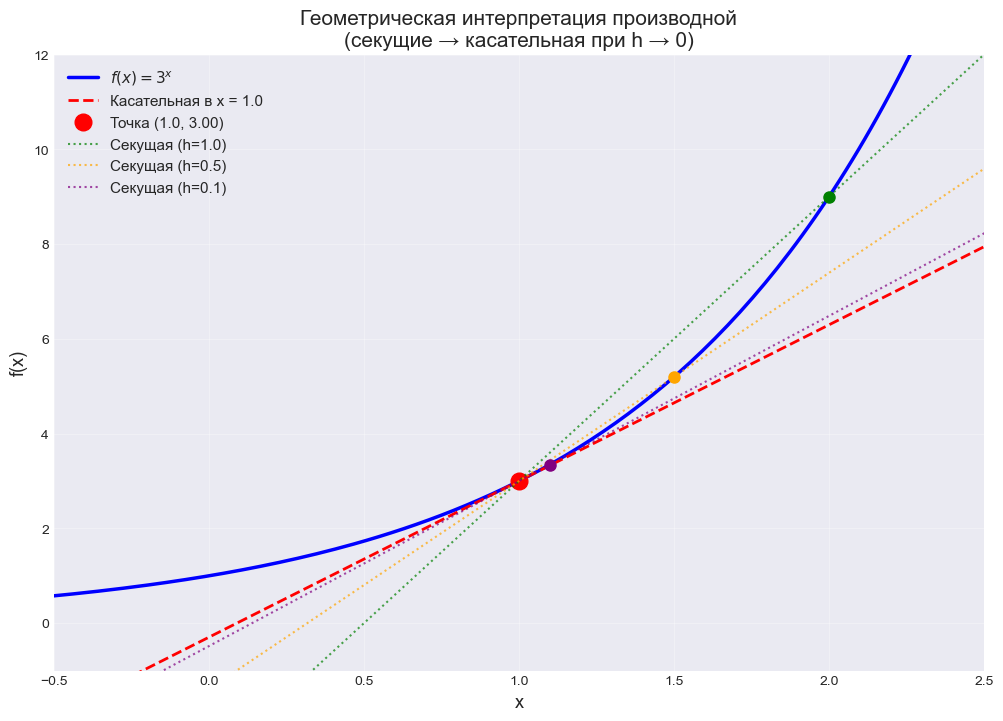

In [14]:
# График функции и касательной
x_vals = np.linspace(-1, 3, 200)
y_vals = 3**x_vals

# Значение функции и производной в точке x0
y0 = 3**x0
slope = 3**x0 * np.log(3)

# Касательная: y = f(x0) + f'(x0)*(x - x0)
tangent = y0 + slope * (x_vals - x0)

plt.figure(figsize=(12, 8))

# График функции
plt.plot(x_vals, y_vals, 'b-', linewidth=2.5, label=r'$f(x) = 3^x$')

# Касательная
plt.plot(x_vals, tangent, 'r--', linewidth=2, label=f'Касательная в x = {x0}')

# Точка касания
plt.plot(x0, y0, 'ro', markersize=12, label=f'Точка ({x0}, {y0:.2f})')

# Секущие для разных h
colors = ['green', 'orange', 'purple']
h_demo = [1.0, 0.5, 0.1]

for i, h_val in enumerate(h_demo):
    x1 = x0 + h_val
    y1 = 3**x1
    
    # Секущая
    secant_slope = (y1 - y0) / h_val
    secant = y0 + secant_slope * (x_vals - x0)
    plt.plot(x_vals, secant, color=colors[i], linestyle=':', linewidth=1.5, 
             alpha=0.7, label=f'Секущая (h={h_val})')
    
    plt.plot(x1, y1, 'o', color=colors[i], markersize=8)

plt.xlabel('x', fontsize=13)
plt.ylabel('f(x)', fontsize=13)
plt.title('Геометрическая интерпретация производной\n(секущие → касательная при h → 0)', fontsize=15)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 2.5)
plt.ylim(-1, 12)
plt.tight_layout()
plt.show()


## Итоговая формула

$$\boxed{(3^x)' = 3^x \ln(3)}$$

где $\ln(3) \approx 1.0986$
